<a href="https://colab.research.google.com/github/thetachenlab/Neural-Network-Bootcamp/blob/main/MNIST_digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('sample_data/mnist_train_small.csv')

In [5]:
from re import X
data = np.array(data)
m, n = data.shape
print(m,n)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T

Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(data_train.shape)
print(X_train.shape)

19999 785
(785, 18999)
(784, 18999)



* ${X_j}= [784\times m]$ where $m$ is the number of training dataset.
* ${Y_j}= [10\times m]$ where $m$ is the number of training dataset.

First layer
* $W^{[1]}_{ij}= [10\times 784]$
* $B^{[1]}_i = [10\times 1]$
* ${Z^{[1]}_i}= [10\times m]$
* ${A^{[1]}_i}= [10\times m]$

Second layer
* $W^{[2]}_{ij}= [10\times10]$
* $B^{[2]}_i = [10\times 1]$
* ${Z^{[2]}_i}= [10\times m]$
* ${A^{[2]}_i}= [10\times m]$

Forward propagation:
\begin{align}
Z^{[1]}_i &= \sum_j^{784} W^{[1]}_{ij}X_j+B^{[1]}_i \\
A^{[1]}_i &= \text{ReLU} (Z^{[1]}_i) \\
Z^{[2]}_i &= \sum_j^{10} W^{[2]}_{ij}A^{[1]}_j+B^{[2]}_i \\
A^{[2]}_i &= \text{softmax} (\{Z^{[2]}_i\}) \\
\end{align}
where $\text{softmax}(\{Z^{[2]}_i\})=e^{Z^{[2]}_i}/\sum_j e^{Z^{[2]}_j}$.

Cross-entropy loss
\begin{equation}
\mathcal{L} = -\sum_i Y_i\log(A^{[2]}_i)
\end{equation}

Backward propagation
\begin{align}
\frac{\partial\mathcal{L}}{\partial A^{[2]}_i}=-\frac{Y_i}{A^{[2]}_i}
\end{align}
\begin{align}
\frac{\partial A^{[2]}_i}{\partial Z^{[2]}_j}&=A^{[2]}_i(1-A^{[2]}_i)\delta_{ij}-A^{[2]}_iA^{[2]}_j(1-\delta_{ij}) \\
\frac{\partial\mathcal{L}}{\partial Z^{[2]}_j}&=\sum_i\frac{\partial\mathcal{L}}{\partial A^{[2]}_i}\frac{\partial A^{[2]}_i}{\partial Z^{[2]}_j}\\
&=-\sum_i\frac{Y_i}{A^{[2]}_i} [A^{[2]}_i(1-A^{[2]}_i)\delta_{ij}-A^{[2]}_iA^{[2]}_j(1-\delta_{ij})]\\
&=-\sum_i{Y_i} [(1-A^{[2]}_i)\delta_{ij}-A^{[2]}_j(1-\delta_{ij})]\\
&=-{Y_j}(1-A^{[2]}_j) + A^{[2]}_j - {Y_j}A^{[2]}_j\\
&=-{Y_j}+ A^{[2]}_j
\end{align}
(Note that $\sum {Y_i}=1$)
so $\delta Z^{[2]}=A^{[2]} -Y$.

---

> Questions: Why we average over the training data to build $\delta W^{[2]}$ here?


\begin{align}
\frac{\partial Z^{[2]}_i}{\partial W^{[2]}_{ij}}&=A^{[1]}_j\\
\frac{\partial\mathcal{L}}{\partial W^{[2]}_{ij}}&=\frac{\partial\mathcal{L}}{\partial Z^{[2]}_i}\frac{\partial Z^{[2]}_i}{\partial W^{[2]}_{ij}}\\
&=(-{Y_i}+ A^{[2]}_i)\cdot A^{[1]}_j
\end{align}
so $\delta W^{[2]}=\frac{1}{m} \delta Z^{[2]}\cdot A^{[1]T}$

\begin{align}
\frac{\partial Z^{[2]}_i}{\partial B^{[2]}_{j}}&=\delta_{ij}\\
\frac{\partial\mathcal{L}}{\partial B^{[2]}_{i}}&=\frac{\partial\mathcal{L}}{\partial Z^{[2]}_i}\frac{\partial Z^{[2]}_i}{\partial B^{[2]}_{i}}\\
&=-{Y_i}+ A^{[2]}_i
\end{align}
so $\delta B^{[2]}=\frac{1}{m}\sum \delta Z^{[2]}$.


---
\begin{align}
\frac{\partial Z^{[2]}_j}{\partial A^{[1]}_k}&=W^{[2]}_{jk}\\
\frac{\partial A^{[1]}_k}{\partial Z^{[1]}_k}&=\Theta(Z^{[1]}_k)\\
\end{align}

\begin{align}
\frac{\partial\mathcal{L}}{\partial Z^{[1]}_k}&=\sum_{j}\frac{\partial\mathcal{L}}{\partial Z^{[2]}_j}\frac{\partial Z^{[2]}_j}{\partial A^{[1]}_k}\frac{\partial A^{[1]}_k}{\partial Z^{[1]}_k}\\
&=\sum_{j}(-{Y_j}+ A^{[2]}_j)W^{[2]}_{jk}\Theta(Z^{[1]}_k)
\end{align}
Note that $\sum_j$ is inner product and the $k$ index is element-wise muliplication. So $\delta Z^{[1]} = W^{[2]T}\cdot\delta Z^{[2]} * \Theta(Z^{[1]})$


Since $Z$ in the first second layers are both linear, we have $\delta W^{[1]}=\frac{1}{m} \delta Z^{[1]}\cdot A^{[0]T}$ where $A^{[0]}\equiv X$ and $\delta B^{[1]}=\frac{1}{m}\sum \delta Z^{[1]}$.

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [9]:
# test
W1, b1, W2, b2 = init_params()
Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)

In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 6 6 ... 6 6 6] [1 1 8 ... 7 4 9]
0.10890046844570767
Iteration:  10
[0 6 9 ... 6 1 1] [1 1 8 ... 7 4 9]
0.19579977893573347
Iteration:  20
[0 6 6 ... 9 1 1] [1 1 8 ... 7 4 9]
0.29280488446760355
Iteration:  30
[2 6 6 ... 9 1 1] [1 1 8 ... 7 4 9]
0.35943997052476445
Iteration:  40
[2 1 6 ... 1 1 1] [1 1 8 ... 7 4 9]
0.41460076846149796
Iteration:  50
[2 1 6 ... 1 1 1] [1 1 8 ... 7 4 9]
0.4694983946523501
Iteration:  60
[2 1 8 ... 1 1 4] [1 1 8 ... 7 4 9]
0.5163955997684089
Iteration:  70
[2 1 8 ... 1 1 4] [1 1 8 ... 7 4 9]
0.5572398547291962
Iteration:  80
[2 1 8 ... 1 1 4] [1 1 8 ... 7 4 9]
0.5895047107742513
Iteration:  90
[2 1 8 ... 1 1 4] [1 1 8 ... 7 4 9]
0.6195589241539028
Iteration:  100
[2 1 8 ... 7 1 4] [1 1 8 ... 7 4 9]
0.6431917469340491
Iteration:  110
[2 1 8 ... 7 1 4] [1 1 8 ... 7 4 9]
0.6612979630506869
Iteration:  120
[2 1 8 ... 7 1 4] [1 1 8 ... 7 4 9]
0.6790357387230906
Iteration:  130
[2 1 8 ... 7 4 4] [1 1 8 ... 7 4 9]
0.690878467287752
Iteration:  1

In [6]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


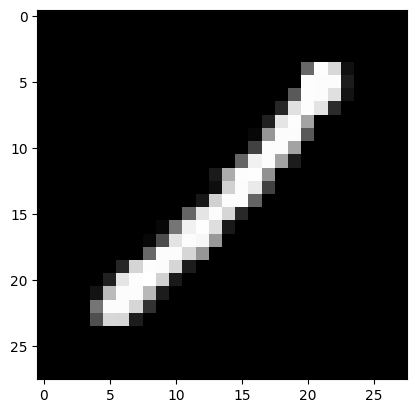

Prediction:  [1]
Label:  1


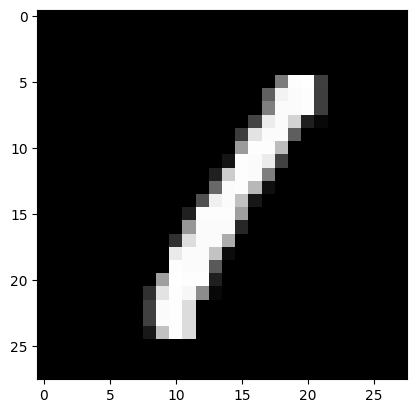

Prediction:  [8]
Label:  8


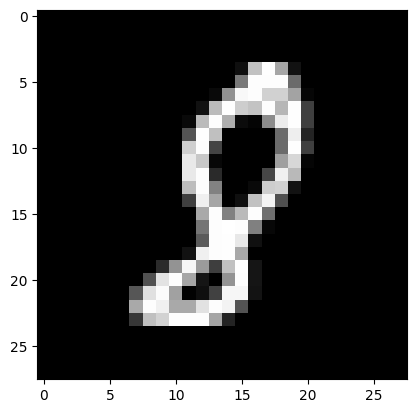

Prediction:  [5]
Label:  8


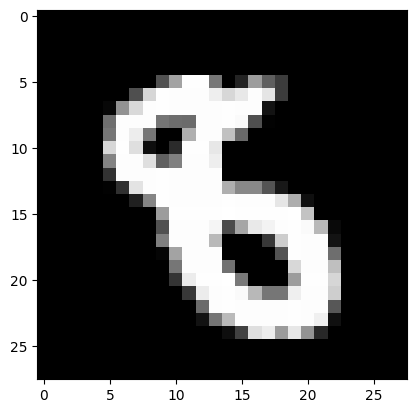

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [13]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 6 2 8 6 0 0 7 7 6 7 2 2 5 5 0 0 4 8 6 8 6 2 0 2 7 7 5 5 8 7 9 9 9 2 2 9
 5 2 1 2 1 1 9 2 6 0 4 2 1 6 6 9 0 1 2 1 9 8 2 3 7 6 2 0 6 7 4 7 0 8 5 6 7
 6 9 0 6 8 5 7 3 7 4 4 9 3 7 6 4 6 2 2 8 1 1 3 2 8 9 6 3 2 5 5 0 1 9 4 9 9
 6 7 2 6 0 0 4 6 8 6 1 8 2 0 8 4 3 7 9 1 1 6 4 0 9 7 4 8 1 0 9 7 7 7 4 3 0
 9 3 0 3 1 3 1 6 8 9 9 6 5 1 4 7 7 6 1 3 6 5 2 7 7 7 3 0 5 6 4 6 8 5 6 8 5
 9 2 5 1 3 3 0 5 0 3 1 3 9 4 5 7 3 3 3 4 6 8 4 8 3 0 1 2 0 5 5 4 6 8 8 8 7
 7 6 3 4 1 0 7 3 1 5 9 5 4 9 2 1 3 0 8 0 9 0 0 5 2 6 0 0 4 1 8 4 8 3 3 7 6
 2 1 7 0 4 9 8 2 8 1 9 7 6 3 8 0 8 8 6 5 4 1 0 5 6 6 8 3 4 5 0 6 5 2 9 5 4
 0 1 8 7 9 5 8 6 8 2 7 7 3 8 6 1 6 9 7 5 0 5 7 1 0 2 2 3 7 9 2 5 4 3 1 4 4
 7 9 1 8 3 1 0 2 8 7 8 2 7 6 0 1 5 0 1 5 0 4 0 1 3 1 7 6 5 8 3 1 0 3 0 1 4
 8 3 9 2 0 2 4 1 5 1 0 4 1 8 1 6 1 5 5 7 6 2 2 1 0 1 2 3 6 8 9 5 1 5 4 6 0
 6 3 9 1 1 1 3 0 1 0 5 1 9 3 9 4 3 3 9 8 5 7 2 4 8 0 0 6 1 1 5 2 8 2 8 0 8
 2 8 3 8 9 7 4 4 9 6 0 6 8 0 5 3 8 1 3 1 0 3 7 3 0 3 9 2 5 9 4 4 8 9 6 1 0
 0 7 4 6 3 6 1 9 6 6 1 7 

0.845